### Dimensionality Reduction

1. Feature elemination

    removing un-necessary features from dataset and only using important features
2. Feature Extraction
    
    Transforming M number of features into N numbers and here N < M
    
    
    example dataset contains 100 columns 4 columns 

In [2]:
import pandas as pd

In [3]:
product = [1,3,5,6,7,8]
price = [100,50,30,50,60,70]

df = pd.DataFrame({'Product':product,'price':price})
df

,Product,price
0,1,100
1,3,50
2,5,30
3,6,50
4,7,60
5,8,70


In [4]:
df['NewColumn'] = df['Product'] * df['price']

In [5]:
df

,Product,price,NewColumn
0,1,100,100
1,3,50,150
2,5,30,150
3,6,50,300
4,7,60,420
5,8,70,560


**Principal Component Analysis(PCA)**

PCA is a technique for feature extraction

**When we use PCA**
1. if you want to reduce number of features but you are not able to identify which features not necessary to remove

**Now we can apply PCA for breast cancer dataset**

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib notebook

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
data = load_breast_cancer()

In [10]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


**How many columns / features**

In [12]:
df.shape # 30 features

(569, 31)

In [13]:
X = df[df.columns[:-1]]
X.shape

(569, 30)

In [14]:
y = df['target']
y.shape

(569,)

**standardizing data**

making all the columns into same scale

In [15]:
from sklearn.preprocessing import StandardScaler

1. create object for standardscaler

In [16]:
scaler = StandardScaler()

2. Transform the features by using fit_transform() method

In [17]:
X_transformed = scaler.fit_transform(X)

In [18]:
X_transformed.shape

(569, 30)

In [19]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
pd.DataFrame(X_transformed).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


**import PCA**

In [22]:
from sklearn.decomposition import PCA

1. create object for PCA

In [24]:
pcaObject = PCA(n_components=2) # number of principal components required

In [25]:
X_pca = pcaObject.fit_transform(X_transformed)

In [27]:
df_pca = pd.DataFrame(X_pca,columns = ['PCA1','PCA2'])
df_pca.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


**Expained_variance_ratio**

In [29]:
explained_variance_ratio = pcaObject.explained_variance_ratio_
print(explained_variance_ratio * 100)

[44.27202561 18.97118204]


**missing information**

In [31]:
100 - sum(explained_variance_ratio*100)

36.756792348440506

**Visualise the data for understand breast cancer**

In [32]:
df_pca['target'] = df['target']

In [35]:
df_pca.sample(5)

,PCA1,PCA2,target
308,-4.657682,-3.065387,1
452,-2.217092,0.029891,1
10,-0.810414,-2.659275,0
23,4.208524,-5.128367,0
364,-3.139988,-1.488022,1


**malignant/ class-1 data**

In [38]:
mask1 = df_pca['target'] == 1

In [40]:
malignant = df_pca[mask1]
malignant.head(3)

,PCA1,PCA2,target
19,-1.237063,-0.188215,1
20,-1.578161,0.572808,1
21,-3.557336,1.662950,1


In [41]:
mask2 = df_pca['target'] == 0

In [43]:
beginin = df_pca[mask2]
beginin.head(3)

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0


<IPython.core.display.Javascript object>


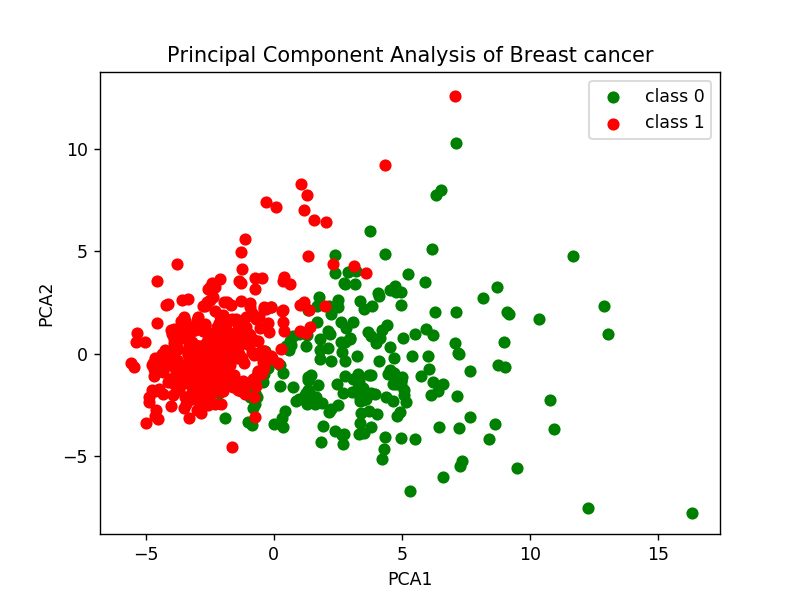

In [46]:
plt.figure()
plt.scatter(beginin['PCA1'],beginin['PCA2'],c='green',label='class 0')
plt.scatter(malignant['PCA1'],malignant['PCA2'],c='red',label='class 1')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Principal Component Analysis of Breast cancer')
plt.legend()
plt.show()

**Apply PCA on IRIS dataset**

In [47]:
from sklearn.datasets import load_iris

In [48]:
data = load_iris()

In [49]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
X = df[df.columns[:-1]]
X.shape

(150, 4)

In [51]:
y = df['target']

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
from sklearn.decomposition import PCA

In [56]:
pcaObject = PCA(n_components=2)
X_pca = pcaObject.fit_transform(X_scaled)

In [57]:
df_pca = pd.DataFrame(X_pca,columns = ['PCA1','PCA2'])
df_pca.head()

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [58]:
df_pca['target'] = df['target']
df_pca.sample(2)

,PCA1,PCA2,target
136,1.576256,1.068581,2
106,0.367018,-1.561503,2


**Visualise data**

In [63]:
mask0 = df_pca['target'] == 0
class_0 = df_pca[mask0]
class_0['target'].unique()

array([0], dtype=int64)

In [64]:
mask1 = df_pca['target'] == 1
class_1 = df_pca[mask1]
class_1['target'].unique()

array([1], dtype=int64)

In [65]:
mask2 = df_pca['target'] == 2
class_2 = df_pca[mask2]
class_2['target'].unique()

array([2], dtype=int64)

<IPython.core.display.Javascript object>


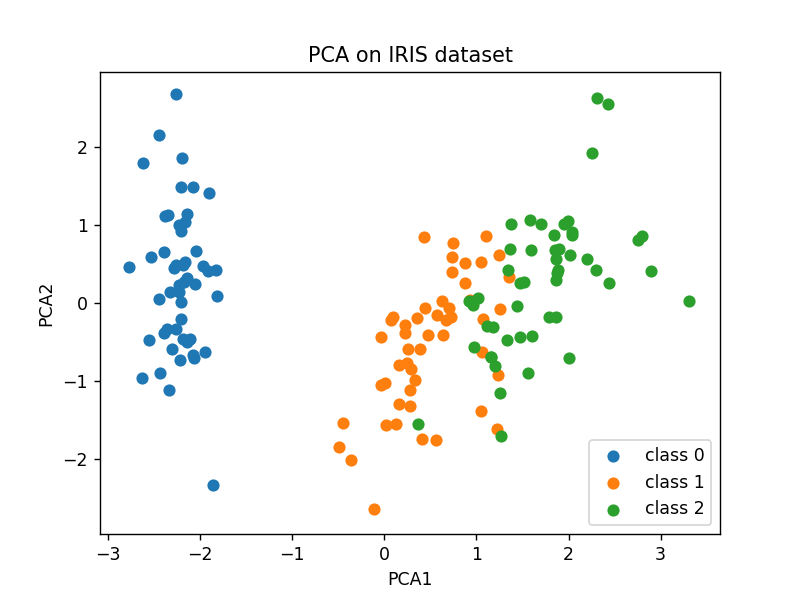

In [66]:
plt.figure()

plt.scatter(class_0['PCA1'],class_0['PCA2'],label='class 0')
plt.scatter(class_1['PCA1'],class_1['PCA2'],label='class 1')
plt.scatter(class_2['PCA1'],class_2['PCA2'],label='class 2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA on IRIS dataset')
plt.legend()
plt.show()

**Day1**
1. Introduction of Machine Learning
2. Types Machine learning
3. Problem solving steps in Machine learning
4. Different Algorithms for Machine Learning


**Day2**

1. working with CSV
2. Linear Regression algorithm for boston dataset
3. Evaluation metric for algorithm

**Day3**
1. Polynomial features for linear regression
2. boston dataset
3. cross validation

**Day4**
1. K-NN algorithm
2. iris -dataset


**Day5**
1. Logistic Regression( classifier)
2. iris dataset
3. SVM for iris dataset

**Day6**
1. Decision Tree algorithm 
2. Label encoder
3. one-hot-encoder
4. get dummies

**Day7**
1. Decision Tree regressor
    reliance data set created manually
2. Random Forest algorithm
3. iris dataset

**Day8**
1. Unsupervised Learning
2. Clustering
3. K-Means clutering algorithm for winedataset

**Day9**
1. Dimentionality Reduction
2. Principal component Analysis(PCA)
3. Breast cancer dataset
4. IRIS dataset

**Resources**
1. [Kaggle http://kaggle.com/](http://kaggle.com/)
2. [http://towardsdatascience.com/](http://towardsdatascience.com/)
3. [https://archive.ics.uci.edu/ml/datasets.php](https://archive.ics.uci.edu/ml/datasets.php)
4. https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

**Exam 4:30 to 5:15 tomorrow(13/aug/2020)**